In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt
from clean import clean_json

In [2]:
def generate_grid(): 
    # We set the range of the grid
    x_min, x_max = 0, 100
    y_min, y_max = -42.5, 42.5

    X,Y = np.meshgrid(np.arange(x_min, x_max + 2.5, 2.5),
                      np.arange(y_min, y_max + 2.5, 2.5))
    
    return X,Y

In [4]:
input_path = os.path.join('.\datasets','2016.json')
output_path = os.path.join('.\datasets','2016.csv')

df = clean_json(input_path, output_path)

100%|█████████████████████████████████████████████████████████████████████████████| 1332/1332 [00:01<00:00, 771.09it/s]


In [5]:
df.sample(10)

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
33317,3,REGULAR,15:27,2016020548,6,Boston Bruins,Shot,David Pastrnak,Robin Lehner,Wrist Shot,81.0,1.0,NaN,NaN,Boston Bruins
45700,2,REGULAR,12:43,2016020753,21,Colorado Avalanche,Shot,Nikita Zadorov,John Gibson,Slap Shot,-1.0,-19.0,NaN,NaN,Anaheim Ducks
71706,3,REGULAR,19:17,2016021176,7,Buffalo Sabres,Shot,Jack Eichel,Frederik Andersen,Wrist Shot,65.0,4.0,NaN,NaN,Buffalo Sabres
7934,1,REGULAR,01:43,2016020133,25,Dallas Stars,Shot,Jason Spezza,Sergei Bobrovsky,Snap Shot,-86.0,18.0,NaN,NaN,Columbus Blue Jackets
34336,3,REGULAR,15:30,2016020565,3,New York Rangers,Shot,Marek Hrivik,Anders Nilsson,Wrist Shot,-47.0,8.0,NaN,NaN,New York Rangers
1521,1,REGULAR,11:49,2016020026,16,Chicago Blackhawks,Shot,Patrick Kane,Marek Mazanec,Backhand,-72.0,-7.0,NaN,NaN,Chicago Blackhawks
29905,2,REGULAR,01:44,2016020492,20,Calgary Flames,Shot,Michael Frolik,Martin Jones,Wrist Shot,57.0,33.0,NaN,NaN,San Jose Sharks
6890,2,REGULAR,15:08,2016020115,6,Boston Bruins,Shot,Patrice Bergeron,Jimmy Howard,Slap Shot,-68.0,20.0,NaN,NaN,Detroit Red Wings
23209,3,REGULAR,15:00,2016020381,29,Columbus Blue Jackets,Goal,Zach Werenski,Louis Domingue,Snap Shot,84.0,38.0,False,Even,Columbus Blue Jackets
75466,1,REGULAR,07:15,2016030123,9,Ottawa Senators,Goal,Mike Hoffman,Tuukka Rask,Backhand,-80.0,1.0,False,Even,Boston Bruins


In [6]:
sub_df = df[df['x_coordinate'] > 0]

In [7]:
sub_df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
1,1,REGULAR,02:53,2016020001,9,Ottawa Senators,Shot,Chris Kelly,Frederik Andersen,Wrist Shot,86.0,13.0,NaN,NaN,Ottawa Senators
2,1,REGULAR,04:01,2016020001,9,Ottawa Senators,Shot,Cody Ceci,Frederik Andersen,Wrist Shot,23.0,-38.0,NaN,NaN,Ottawa Senators
3,1,REGULAR,04:46,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-15.0,NaN,NaN,Ottawa Senators
8,1,REGULAR,09:00,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-18.0,NaN,NaN,Ottawa Senators
9,1,REGULAR,10:16,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Wrist Shot,34.0,20.0,NaN,NaN,Ottawa Senators


In [8]:
X,Y = generate_grid()

In [9]:
def shot_count_in_grid(X : np.array, Y : np.array, df : pd.DataFrame):
    counts = np.zeros([np.shape(X)[1], np.shape(X)[0]])
    step = X[0,1] - X[0,0]

    x_min, y_max = np.min(X), np.max(Y)

    for _,row in df.iterrows(): 
        x_coord = row['x_coordinate']
        y_coord = row['y_coordinate']

        x_index = int((x_coord - x_min) /step)
        y_index = int((y_max - y_coord) /step)

        counts[x_index,y_index] += 1

    return counts

In [10]:
matrix = shot_count_in_grid(X,Y,sub_df)

In [11]:
x_vector = X[0,:]
y_vector = Y[:,0]

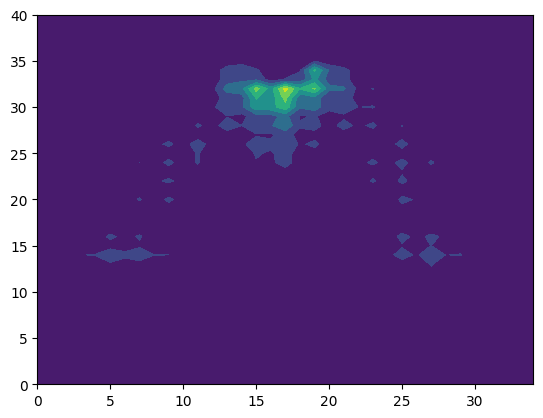

In [12]:
pic_path = os.path.join('./img','terrain_hockey.png')
img = plt.imread(pic_path)



cs = plt.contourf(matrix)
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()


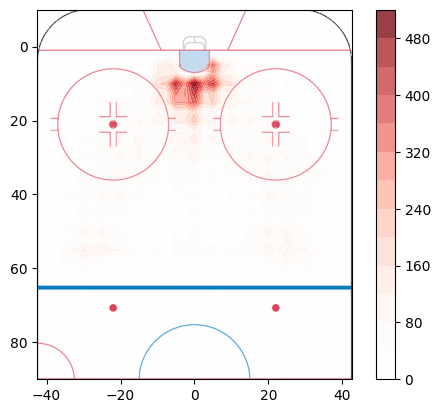

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image


def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap


#Use base cmap to create transparent
mycmap = transparent_cmap(plt.cm.Reds)

I = Image.open('./img/attack_zone.png')
y, x = np.mgrid[-10:90, -42.5:42.5]

#Plot image and overlay colormap
fig, ax = plt.subplots(1, 1)
ax.imshow(I, extent=[-42.5, 42.5, 90, -10])
cb = ax.contourf(y_vector, -x_vector+90, matrix, 15, cmap=mycmap)
plt.colorbar(cb)
plt.show()